In [8]:
!pip install nltk 

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
import nltk 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

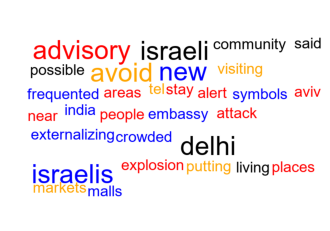

30


In [14]:
import random
import warnings
warnings.filterwarnings("ignore")
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["asks", "particularly", "also", ",", "."])
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stop_words]
    return words

def calculate_word_freq(words):
    word_freq = {}
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1
    return word_freq

def createcloud(wordfreq, words, size=(800, 550)):
    cloud = Image.new("RGB", size, "white")
    img = ImageDraw.Draw(cloud)
    displayedwords = set()
    x = 50
    y = 50
    pos = []
    f = []
    color = ["black", "red", "blue", "orange"]
    for i in range(0, 35):
        v = random.randint(0, 35)
        if v not in pos:
            pos.append(v)
        else:
            while v in pos:
                v = random.randint(0, 35)
            pos.append(v)
        f.append(words[v])
    for word in f:
        l = wordfreq[word]
        word = word + " "
        if word not in displayedwords:
            fontsize = int(10 + 85 * l / 3)
            font = ImageFont.truetype("arial.ttf", fontsize)
            word_width, word_height = img.textsize(word, font=font)
            if x + word_width + 10 > size[0]:
                x = 40
                y += word_height + 18
            img.text((x + random.randint(10, 25), y + random.randint(15, 30)), word, fill=random.choice(color), font=font)
            x += word_width
            displayedwords.add(word)


    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

text = """It is possible that the explosion near the Israeli embassy in New Delhi is an attack Tel Aviv has said, putting out an advisory for Israelis living in India and particularly in New Delhi. The advisory asks Israelis to avoid visiting crowded places such as malls and markets, particularly areas frequented by people from the community. It also asks them to stay alert and avoid externalizing Israeli symbols."""
words = preprocess_text(text)
word_freq = calculate_word_freq(words)
createcloud(word_freq, words)
print(len(word_freq))
